### 1 - exercise

Load the zipcode_dict_corrected.npy file into a dictionary. <br>
Create a list (called df_rows) from the dictionary where each element looks like ['city','zipcode']. For each city there should be a row for all the corresponding zip codes.

In [187]:
zipcode_dict = np.load('zipcode_dict_corrected.npy', allow_pickle = True).item()
zipcode_dict

zipcode_dict.keys()
zipcode_dict.values()

df_rows = []
for k,v in zipcode_dict.items():
    print('key', k)
    print('value',v)
    for vv in v:
        print('this will be a row: ',[k,vv])
        df_rows.append([k,vv])

key San Jose
value ['94088', ',94089', ',94538', ',94560', ',95002', ',95008', ',95013', ',95035', ',95037', ',95050', ',95054', ',95101', ',95103', ',95106', ',95108', ',95109', ',95110', ',95111', ',95112', ',95113', ',95115', ',95116', ',95117', ',95118', ',95119', ',95120', ',95121', ',95122', ',95123', ',95124', ',95125', ',95126', ',95127', ',95128', ',95129', ',95130', ',95131', ',95132', ',95133', ',95134', ',95135', ',95136', ',95138', ',95139', ',95141', ',95148', ',95150', ',95151', ',95152', ',95153', ',95154', ',95155', ',95156', ',95157', ',95158', ',95160', ',95161', ',95164', ',95170', ',95172', ',95173', ',95190', ',95191', ',95192', ',95193', ',95194', ',95196']
this will be a row:  ['San Jose', '94088']
this will be a row:  ['San Jose', ',94089']
this will be a row:  ['San Jose', ',94538']
this will be a row:  ['San Jose', ',94560']
this will be a row:  ['San Jose', ',95002']
this will be a row:  ['San Jose', ',95008']
this will be a row:  ['San Jose', ',95013']
this

In [114]:
df_rows



[['San Jose', '94088'],
 ['San Jose', ',94089'],
 ['San Jose', ',94538'],
 ['San Jose', ',94560'],
 ['San Jose', ',95002'],
 ['San Jose', ',95008'],
 ['San Jose', ',95013'],
 ['San Jose', ',95035'],
 ['San Jose', ',95037'],
 ['San Jose', ',95050'],
 ['San Jose', ',95054'],
 ['San Jose', ',95101'],
 ['San Jose', ',95103'],
 ['San Jose', ',95106'],
 ['San Jose', ',95108'],
 ['San Jose', ',95109'],
 ['San Jose', ',95110'],
 ['San Jose', ',95111'],
 ['San Jose', ',95112'],
 ['San Jose', ',95113'],
 ['San Jose', ',95115'],
 ['San Jose', ',95116'],
 ['San Jose', ',95117'],
 ['San Jose', ',95118'],
 ['San Jose', ',95119'],
 ['San Jose', ',95120'],
 ['San Jose', ',95121'],
 ['San Jose', ',95122'],
 ['San Jose', ',95123'],
 ['San Jose', ',95124'],
 ['San Jose', ',95125'],
 ['San Jose', ',95126'],
 ['San Jose', ',95127'],
 ['San Jose', ',95128'],
 ['San Jose', ',95129'],
 ['San Jose', ',95130'],
 ['San Jose', ',95131'],
 ['San Jose', ',95132'],
 ['San Jose', ',95133'],
 ['San Jose', ',95134'],
 

### 1 - check yourself

In [188]:
if len(df_rows) == 146:
    print('Your list is correct')
else:
    print('Your list is NOT correct')

Your list is correct


### 2 - exercise

- Create a dataframe from the df_rows list, where the columns are called landmark az zipcode <br>
- Create a new column in the dataframe called zip that contains the values from the zipcode column without the ',' and converted into integer type
- Drop the zipcode column

In [189]:
zipdf = pd.DataFrame(df_rows, columns= ['landmark','zipcode'])
zipdf['zip'] = zipdf['zipcode'].apply(lambda x: int(x.replace(',','')))
zipdf.drop(columns = ['zipcode'], inplace= True)

In [127]:
zipdf

,landmark,zip
0,San Jose,94088
1,San Jose,94089
2,San Jose,94538
3,San Jose,94560
4,San Jose,95002
...,...,...
141,San Francisco,94164
142,San Francisco,94171
143,San Francisco,94172
144,San Francisco,94177


### 2 - check yourself

In [190]:
from pandas.api.types import is_numeric_dtype
if is_numeric_dtype(zipdf['zip']) and len(zipdf) == 146:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 3 - exercise
Load the trip, station and weather csv-s into pandas dataframes <br>
Join them on the appropriate columns and create a final dataframe called merged_df where there is a row for each trip with the weather conditions for the corresponding day in the corresponding city (landmark)

In [191]:
trip = pd.read_csv('trip.csv')
station = pd.read_csv('station.csv')
weather = pd.read_csv('weather.csv')

merged_df = pd.merge(trip, station, left_on = 'Start Station', right_on = 'name', how='inner')
merged_df = pd.merge(merged_df, zipdf, left_on = 'zip_code', right_on = 'zip', how = 'inner' )
merged_df.drop(columns = ['zip_code'], inplace= True)
merged_df = pd.merge(merged_df, weather, how='inner', on=['landmark','date_to_join'])

In [161]:
weather

,Date,Max_Temperature_F,Mean_Temperature_F,Min_Temperature_F,Max_Dew_Point_F,Mean_Dew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,landmark,datetime,date_to_join
0,8/29/2013,74.0,68.0,61.0,61,58,56,93,75,57,...,23,11,28.0,0.0,4,no_event,286,San Francisco,2013-08-29,2013-08-29
1,8/30/2013,78.0,69.0,60.0,61,58,56,90,70,50,...,29,13,35.0,0.0,2,no_event,291,San Francisco,2013-08-30,2013-08-30
2,8/31/2013,71.0,64.0,57.0,57,56,54,93,75,57,...,26,15,31.0,0.0,4,no_event,284,San Francisco,2013-08-31,2013-08-31
3,9/1/2013,74.0,66.0,58.0,60,56,53,87,68,49,...,25,13,29.0,0.0,4,no_event,284,San Francisco,2013-09-01,2013-09-01
4,9/2/2013,75.0,69.0,62.0,61,60,58,93,77,61,...,23,12,30.0,0.0,6,no_event,277,San Francisco,2013-09-02,2013-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,11/6/2013,72.0,60.0,47.0,43,38,31,66,46,26,...,7,2,17.0,0.0,0,no_event,339,Palo Alto,2013-11-06,2013-11-06
916,11/7/2013,72.0,61.0,50.0,52,45,38,86,59,31,...,15,3,18.0,0.0,0,no_event,2,Palo Alto,2013-11-07,2013-11-07
917,11/8/2013,69.0,59.0,49.0,52,49,46,93,71,49,...,12,4,22.0,0.0,3,no_event,352,Palo Alto,2013-11-08,2013-11-08
918,11/9/2013,70.0,58.0,46.0,51,47,43,93,67,40,...,10,2,12.0,0.0,0,no_event,349,Palo Alto,2013-11-09,2013-11-09


### 3 - check yourself

In [192]:
if sorted(merged_df['Events'].value_counts().tolist()) == [496, 793, 10389, 11689, 120057]:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 4 - exercise

Create a new column in the merged_df called weekend where the value is True for Saturday and Sunday and False for the other days. If you want you can create helper column that contains the name of the day first

In [195]:
import datetime as dt
merged_df['weekday'] = pd.to_datetime(merged_df['date_to_join'], format='%Y/%m/%d').dt.day_name()
merged_df['weekend'] = merged_df['weekday'].apply(lambda x: True if x in ['Saturday','Sunday'] else False)

# Solution checker appears to be wrong. Code logic seems to be correct and weekend column showing correct T/F agaonst weekday names

In [176]:
merged_df

,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date,...,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,datetime,weekday,weekend
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00,...,23,11,28.0,0.0,4,no_event,286,2013-08-29,Thursday,False
1,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00,...,23,11,28.0,0.0,4,no_event,286,2013-08-29,Thursday,False
2,4760,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,2013-08-29 17:01:00,...,23,11,28.0,0.0,4,no_event,286,2013-08-29,Thursday,False
3,5070,8/29/2013 21:43,South Van Ness at Market,66,8/29/2013 21:46,South Van Ness at Market,66,598,Subscriber,2013-08-29 21:43:00,...,23,11,28.0,0.0,4,no_event,286,2013-08-29,Thursday,False
4,4765,8/29/2013 17:05,South Van Ness at Market,66,8/29/2013 17:08,Market at 10th,67,553,Subscriber,2013-08-29 17:05:00,...,23,11,28.0,0.0,4,no_event,286,2013-08-29,Thursday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143419,173059,2/1/2014 11:14,Broadway at Main,25,2/1/2014 14:05,Broadway at Main,25,199,Customer,2014-02-01 11:14:00,...,10,4,NaN,0.0,0,no_event,293,2014-02-01,Saturday,True
143420,190435,2/20/2014 11:30,Broadway at Main,25,2/20/2014 11:33,San Mateo County Center,23,674,Subscriber,2014-02-20 11:30:00,...,6,1,NaN,0.0,2,no_event,285,2014-02-20,Thursday,False
143421,22571,9/15/2013 17:48,Broadway at Main,25,9/15/2013 17:57,Franklin at Maple,21,262,Subscriber,2013-09-15 17:48:00,...,15,6,20.0,0.0,5,no_event,283,2013-09-15,Sunday,True
143422,150575,1/12/2014 13:47,Castro Street and El Camino Real,32,1/12/2014 13:57,Mountain View Caltrain Station,28,682,Customer,2014-01-12 13:47:00,...,15,3,15.0,0.0,2,no_event,293,2014-01-12,Sunday,True


### 4 - check yourself

In [194]:
if sorted(merged_df['weekend'].value_counts().tolist()) == [22980, 121005]:
    print('The weekend column is correct')
else:
    print('The weekend column is NOT correct')

The weekend column is NOT correct


### 5 - exercise

We would like to plot the number of trips taken by Customers/Subscribers by the different weather conditions. Let's start with the Max_Temperature_F! <br>
Create a dataframe where we can find for each possible values of the Max_Temperature_F: how many trips were taken by Subscirption Type and weekend. It will be the easiest to plot if the dataframe is in long format: for each temperature value there are 4 rows: weekend - Customer, weekend - Subscriber, weekday - Customer, weekday - Subscriber. Name the columns containing the number of trips to num_trips.

In [208]:
toplot = merged_df.groupby(['Max_Temperature_F','Subscription Type','weekend']).size().reset_index().rename(columns={0: 'num_trips'})

In [204]:
toplot

,Max_Temperature_F,Subscription Type,weekend,nb_trips
0,46.0,Customer,True,3
1,46.0,Subscriber,True,7
2,47.0,Customer,True,69
3,47.0,Subscriber,True,194
4,48.0,Subscriber,False,3
...,...,...,...,...
160,91.0,Subscriber,True,2
161,94.0,Customer,True,25
162,94.0,Subscriber,True,1
163,95.0,Customer,True,27


### 5 - check yourself

In [209]:
if len(toplot) == 165:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 6 - exercise
Use seaborn to lmplot to plot the relationship between the max temperature and the number of trips taken by Customers/Subscribers! Draw two separate plots for weekends and weekdays next to each other!

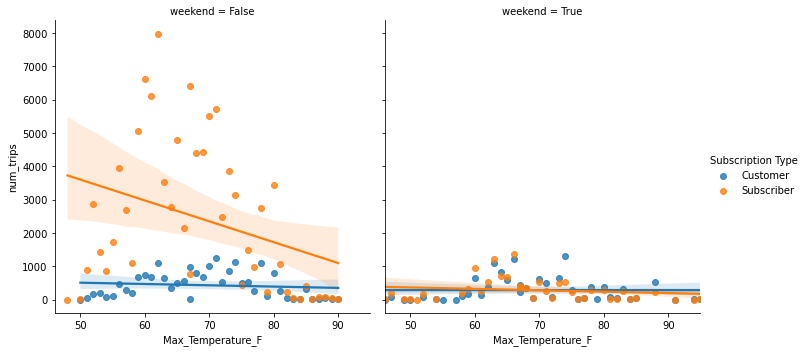

In [210]:
import seaborn as sns
sns.lmplot(data=toplot, x='Max_Temperature_F',y='num_trips', hue='Subscription Type', col='weekend')


### 7 - exercise

Use a for loop to draw similar charts for all numeric weather conditions! Write one observation about what you see on the charts! It can be about one chart or the comparison of multiple charts!

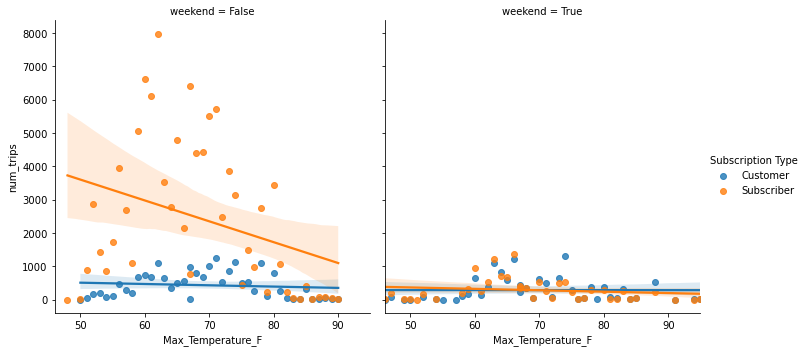

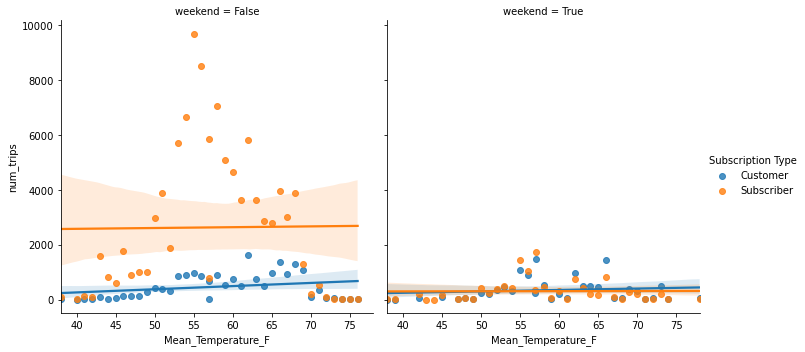

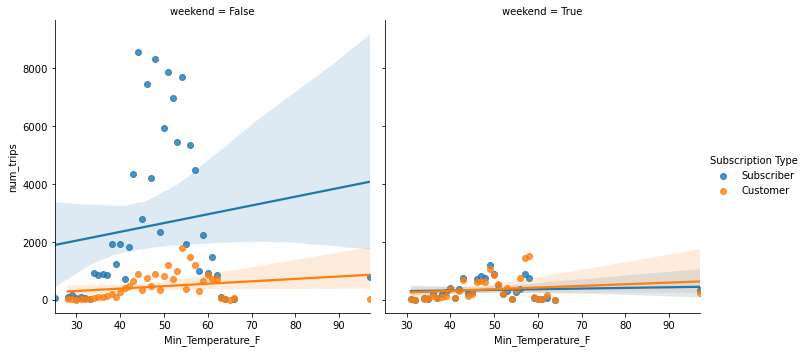

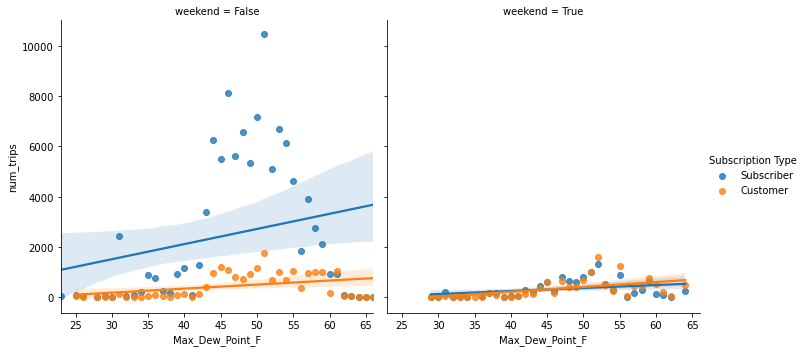

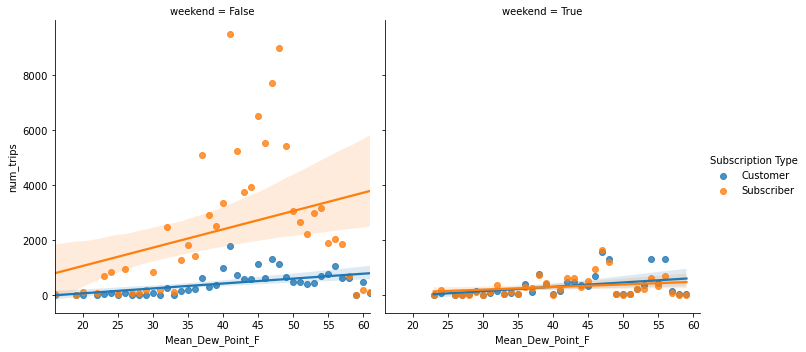

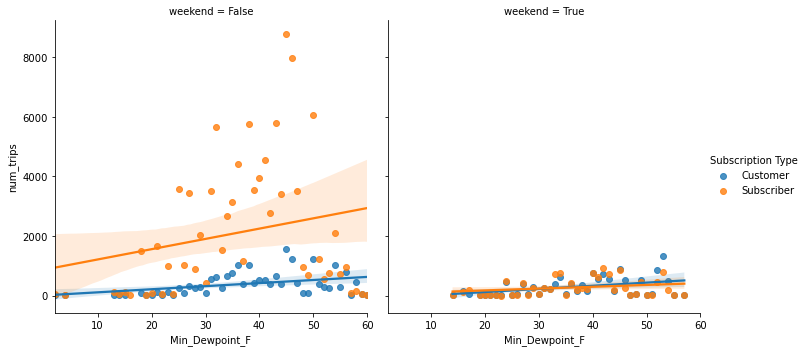

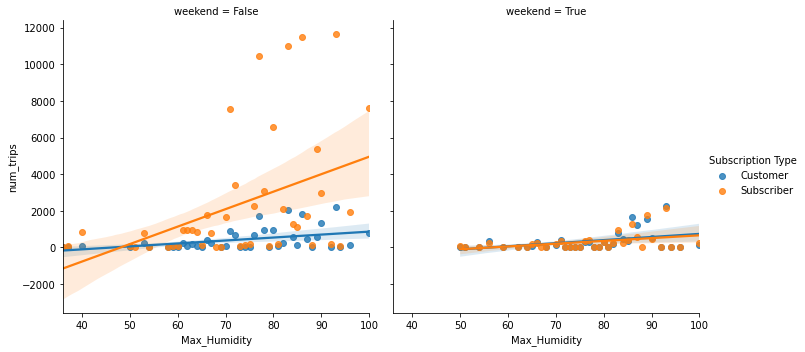

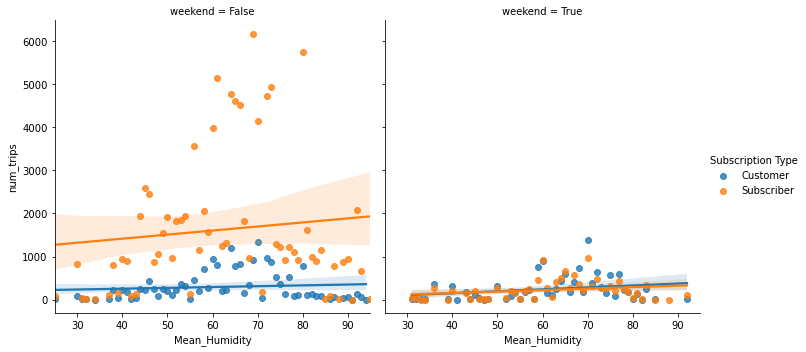

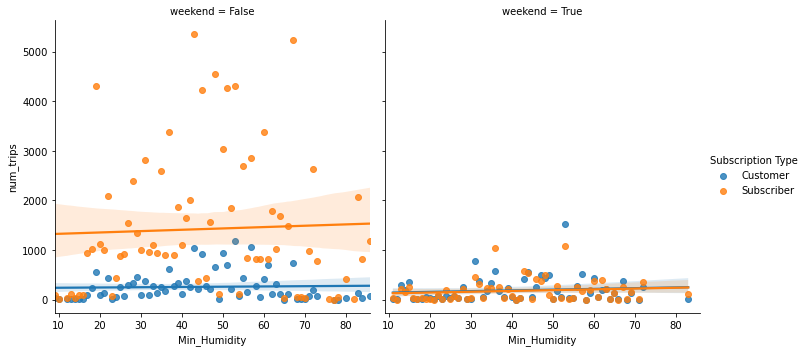

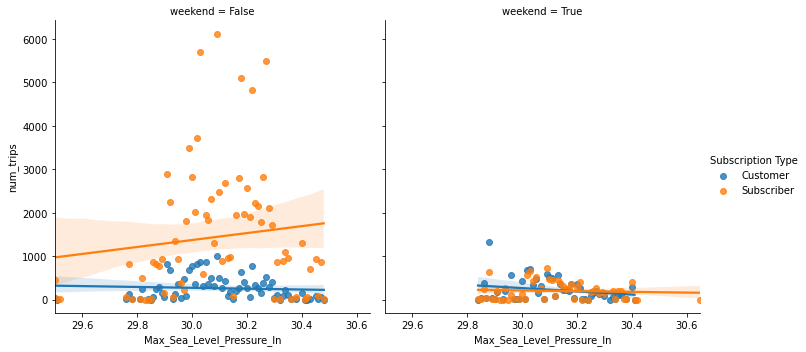

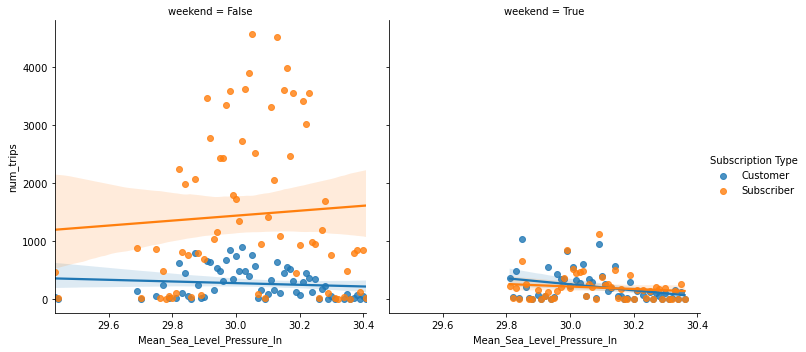

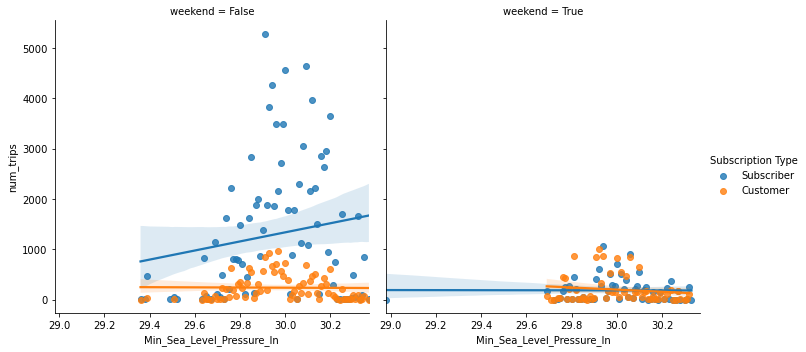

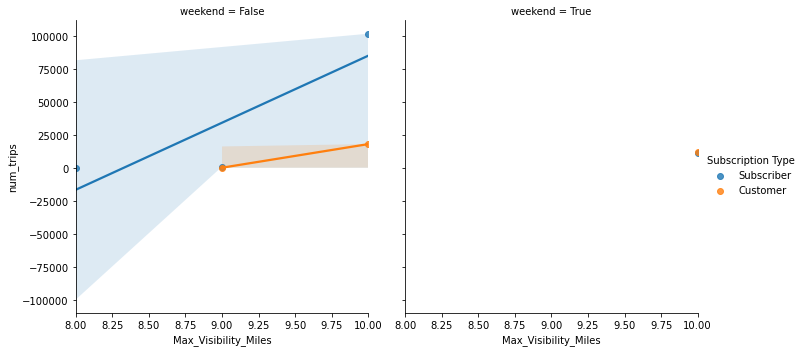

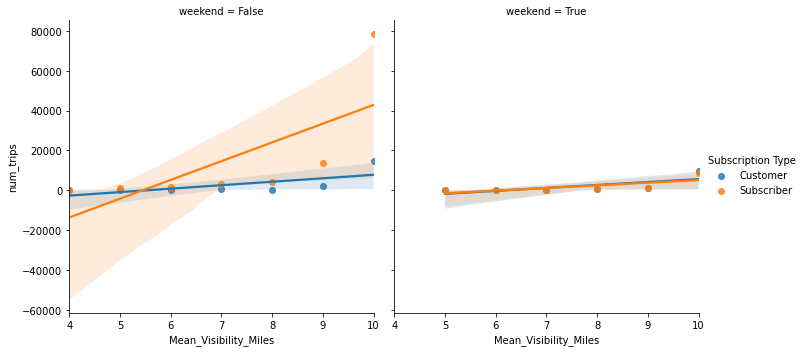

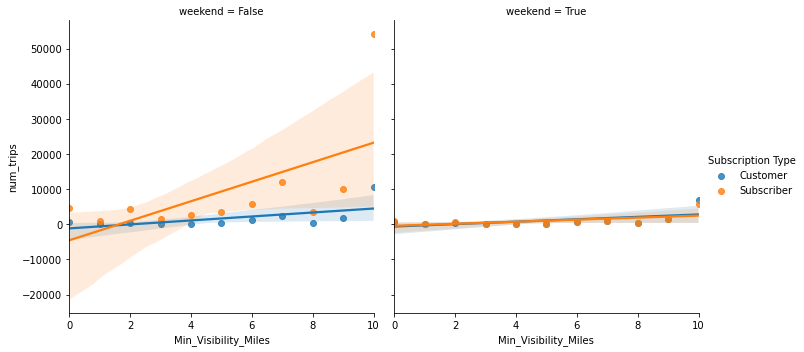

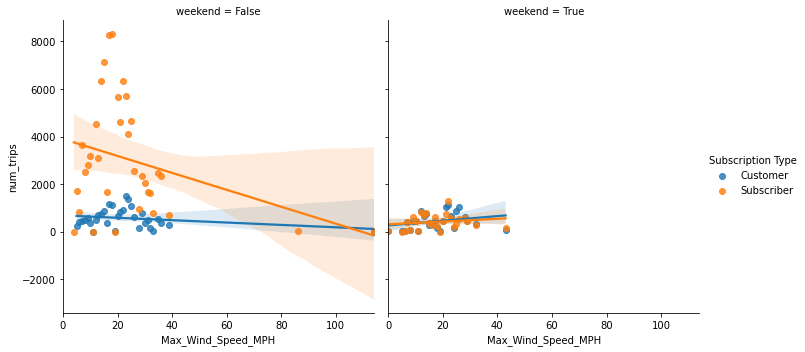

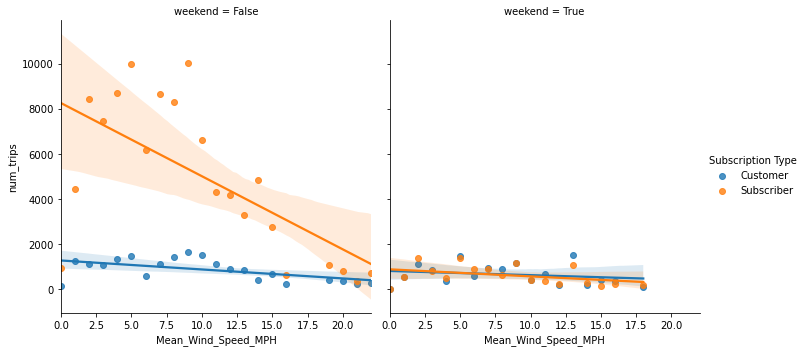

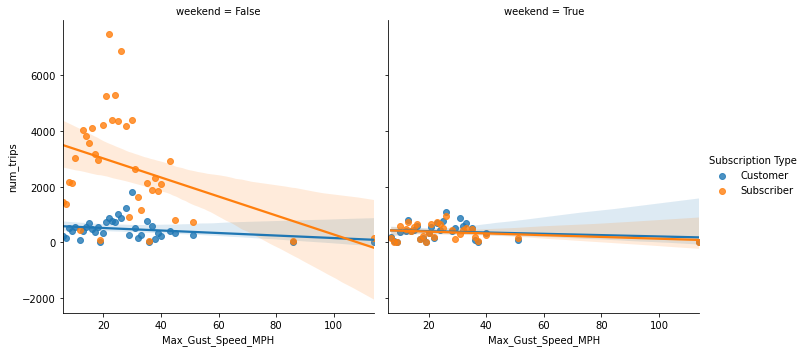

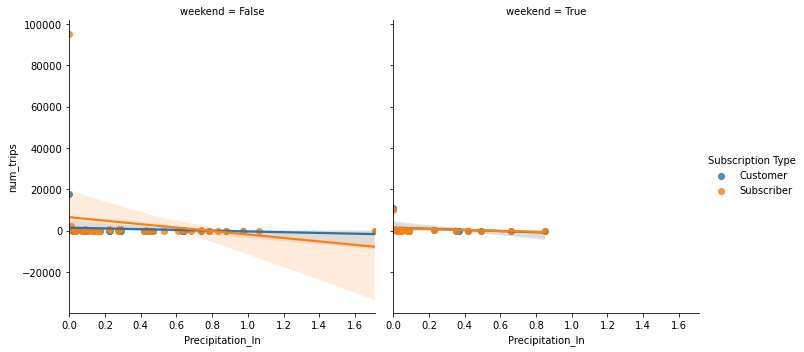

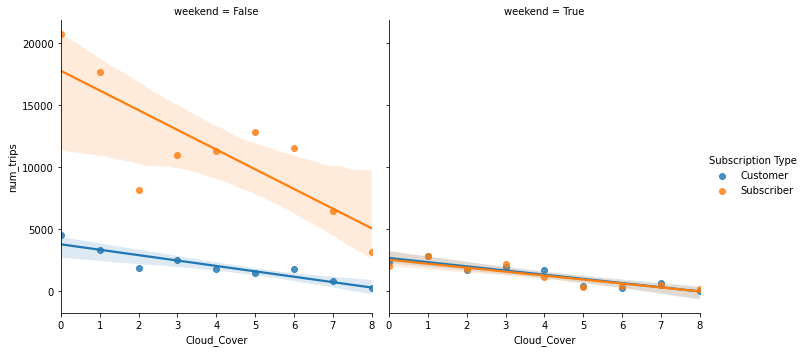

In [212]:
weather_measure = ['Max_Temperature_F', 'Mean_Temperature_F', 'Min_Temperature_F',
       'Max_Dew_Point_F', 'Mean_Dew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_Pressure_In',
       'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In','Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles',
       'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH',
       'Precipitation_In', 'Cloud_Cover']


for x in weather_measure :
        toplot = merged_df.groupby([x,'Subscription Type', 'weekend']).size().reset_index().rename(columns ={0:'num_trips'})
        sns.lmplot(data=toplot, x= x, y = 'num_trips', hue = 'Subscription Type', col = 'weekend') 


Observation for first chart: The number of trips seems to increase between mean temperatures 60-70 on Mon-Fri while on weekends we can also see a small crest between the 60-70 mark. Mon-Fri people need to go out for work, school, or errands hence depsite hotter temperatures they have to go out. But when temperature passes a certain threshold like 70, the trip number falls and people prefer using alternate means of transport or stay inside. On weekends, people can stay inside during hot temperatures and hence trip count remains very low.

### Bonus exercise

Use the Bokeh library to draw an interactive plot about the data! The chart should have at least one interactive element (e.g. hover, clickable legend...)